In [1]:
import sys
sys.path.append("../../")
from dna import *

**pCMV-Target-AID construction**  
The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. 

In [2]:
pCMV_ABE             = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")
pCMV_nCas_PmCDA1_ugi = DNA(record="input/addgene_79620.gbk", project="pCMV-nCas-PmCDA1-ugi")

In [3]:
description1 = "The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) \
(Addgene 79620) using primer pairs RS045/HM129."
RS045 = "GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG"
HM129 = "CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(RS045[-18:], key_attribute="sequence") #Search FW primer binding region
RV    = pCMV_nCas_PmCDA1_ugi.finddna(HM129[-18:], key_attribute="sequence") #Search RV primer binding region
frag1 = cropdna(pCMV_nCas_PmCDA1_ugi, *FW, *RV, process_description=description1)
frag1 = modifyends(frag1, RS045, flipdna(HM129), process_description=description1) #Simulate PCR

In [4]:
description2 = "The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) \
(Addgene 79620) using primer pairs HM128/RS046"
HM128 = "CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC"
RS046 = "TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(HM128[-18:], key_attribute="sequence")
RV    = pCMV_nCas_PmCDA1_ugi.finddna(RS046[-18:], key_attribute="sequence")
frag2 = cropdna(pCMV_nCas_PmCDA1_ugi, *FW, *RV, process_description=description2)
frag2 = modifyends(frag2, HM128, flipdna(RS046), process_description=description2)

In [5]:
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048"
RS047  = "ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC" 
RS048  = "CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG"
FW     = pCMV_ABE.finddna(RS047[-18:], key_attribute="sequence") 
RV     = pCMV_ABE.finddna(RS048[-18:], key_attribute="sequence")
frag3  = cropdna(pCMV_ABE, *FW, *RV, process_description=description3)
frag3  = modifyends(frag3, RS047, flipdna(RS048), process_description=description3)

In [6]:
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed \
by assembling the two insert fragments and the backbone fragment."
frag1 = modifyends(frag1, "*{25}/-{25}","-{28}/*{28}", process_description=description4)
frag2 = modifyends(frag2, "*{28}/-{28}","-{25}/*{25}", process_description=description4)
frag3 = modifyends(frag3, "*{25}/-{25}","-{25}/*{25}", process_description=description4) 
pCMV_Target_AID = joindna(frag1, frag2, frag3, topology="circular", project="pCMV-Target-AID", process_description=description4)

In [7]:
Cas9 = pCMV_Target_AID.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_AID = cutdna(pCMV_Target_AID, Cas9.start)[0]
pCMV_Target_AID = joindna(pCMV_Target_AID)
pCMV_Target_AID.printfeature()
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")
exporthistory(pCMV_Target_AID, "output/pCMV-Target-AID_reconstruction.py") 

feature_id  qualifier:label     feature_type  start  end   strand  
0           null                source        0      2497  +       
100         Cas9(D10A)          CDS           0      4104  +       
3200        pCMV-Target-AID     source        0      8752  +       
300         null                source        2539   5299  +       
400         SV40 NLS            CDS           4116   4137  +       
500         3xFLAG              CDS           4344   4410  +       
600         SV40 NLS            CDS           5043   5064  +       
700         UGI                 CDS           5070   5299  +       
800         null                source        5345   8681  +       
900         BGH-rev             primer_bind   5347   5365  -       
1000        bGH poly(A) signal  polyA_signal  5353   5578  +       
1100        M13 rev             primer_bind   5648   5665  -       
1200        M13 Reverse         primer_bind   5648   5665  -       
1300        M13/pUC Reverse     primer_bind   56

**pCMV-Target-ACE construction**  
The Target-ACE plasmid (pCMV-Target-ACE) was constructed with a fragment encoding a plasmid backbone as well as ABE7.10 amplified from pCMV-ABE7.10 using RS047/RS052 and a fragment encoding the C-terminus region of Target-AID amplified from pcDNA-pCMV-nCas9 using RS051/RS046.

In [8]:
description5 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS052"
RS052 = "ACCTCCTCCACCGTCACCCCCAAGCTGTGACA"
FW    = pCMV_ABE.finddna(RS047[-18:],key_attribute="sequence")
RV    = pCMV_ABE.finddna(RS052[-18:],key_attribute="sequence")
frag4 = cropdna(pCMV_ABE, *FW, *RV, process_description=description5)
frag4 = modifyends(frag4, RS047, flipdna(RS052), process_description=description5)

In [9]:
description6 = "The insert fragment encoding the C-terminus region of Target-AID was \
amplified from pcDNA-pCMV-nCas9 using RS051/RS046."
RS051 = "GCTTGGGGGTGACGGTGGAGGAGGTACCGGCGG"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(RS051[-18:],key_attribute="sequence")
RV    = pCMV_nCas_PmCDA1_ugi.finddna(RS046[-18:],key_attribute="sequence")
frag5 = cropdna(pCMV_nCas_PmCDA1_ugi, *FW, *RV, process_description=description6)
frag5 = modifyends(frag5, RS051, flipdna(RS046), process_description=description6)

In [10]:
description7 = "The Target-ACE plasmid (pCMV-Target-ACE) was constructed by \
assembling the insert fragment and a backbone fragment."
frag4 = modifyends(frag4, "*{25}/-{25}","-{25}/*{25}", process_description=description7)
frag5 = modifyends(frag5, "*{25}/-{25}","-{25}/*{25}", process_description=description7)
pCMV_Target_ACE = joindna(frag4, frag5, topology="circular", project="pCMV-Target-ACE", process_description=description7)

In [11]:
Cas9 = pCMV_Target_ACE.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_ACE = cutdna(pCMV_Target_ACE, Cas9.start)[0]
pCMV_Target_ACE = joindna(pCMV_Target_ACE)
pCMV_Target_ACE.printfeature()
pCMV_Target_ACE.writedna("output/pCMV-Target-ACE.gbk")
exporthistory(pCMV_Target_ACE, "output/pCMV-Target-ACE_reconstruction.py") 

feature_id  qualifier:label     feature_type  start  end   strand  
0           null                source        0      4081  +       
100         Cas9(D10A)          CDS           0      4081  +       
3000        pCMV-Target-ACE     source        0      9856  +       
300         null                source        4121   5263  +       
400         3xFLAG              CDS           4308   4374  +       
500         SV40 NLS            CDS           5007   5028  +       
600         UGI                 CDS           5034   5263  +       
800         null                source        5309   8759  +       
900         BGH-rev             primer_bind   5311   5329  -       
1000        bGH poly(A) signal  polyA_signal  5317   5542  +       
1100        M13 rev             primer_bind   5612   5629  -       
1200        M13 Reverse         primer_bind   5612   5629  -       
1300        M13/pUC Reverse     primer_bind   5625   5648  -       
1400        lac operator        protein_bind  56

**pCMV-Target-AIDmax construction**  
To construct the Target-AIDmax plasmid (pCMV-Target-AIDmax), the pUC-optimized-PmCDA1-ugi plasmid encoding the codon-optimized C-terminal region of Target-AIDmax was first constructed by the gene synthesis service of GenScript. This C terminus fragment was then amplified with primer pair SI1304/SI1307 and assembled with a nCas9 fragment amplified from pCMV-BE4max using SI1308/SI1305 and a backbone fragment amplified from pCMV-ABEmax using SI1310/SI1309. 

In [12]:
pCMV_ABEmax    = DNA(record="input/addgene_112095.gbk", project="pCMV-ABEmax")
pCMV_BE4max    = DNA(record="input/addgene_112093.gbk", project="pCMV-BE4max")
opt_pmCDA1_ugi = DNA(record="input/puc-optimized-pmcda1-ugi.gb", project="opt-pmCDA1-ugi")

In [13]:
description8 = "The fragment encoding the codon-optimized C-terminal region of Target-AIDmax \
was amplified with primer pair SI1304/SI1307."
SI1304 = "CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG"
SI1307 = "TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC"
FW     = opt_pmCDA1_ugi.finddna(SI1304[-18:], key_attribute="sequence")
RV     = opt_pmCDA1_ugi.finddna(SI1307[-18:], key_attribute="sequence")
frag6  = cropdna(opt_pmCDA1_ugi,*FW,*RV, process_description=description8)
frag6  = modifyends(frag6, SI1304, flipdna(SI1307), process_description=description8)

In [14]:
description9 = "The fragment encoding a nCas9 fragment was amplified from pCMV-BE4max using SI1308/SI1305."
SI1308 = "ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT"
SI1305 = "GTCACCTCCCAGCTGAGACAGGTCG"
FW     = pCMV_BE4max.finddna(SI1308[-18:], key_attribute="sequence")
RV     = pCMV_BE4max.finddna(SI1305[-18:], key_attribute="sequence")
frag7  = cropdna(pCMV_BE4max, *FW, *RV, process_description=description9)
frag7  = modifyends(frag7, SI1308, flipdna(SI1305), process_description=description9)

In [15]:
description10 = "The backbone fragment was amplified from pCMV-ABEmax using SI1310/SI1309."
SI1310 = "TGATAATGAGTTTAAACCCGCTGA"
SI1309 = "GACTTTCCGCTTCTTCTTTGGTGACTCG"
FW     = pCMV_ABEmax.finddna(SI1310[-18:], key_attribute="sequence")
RV     = pCMV_ABEmax.finddna(SI1309[-18:], key_attribute="sequence")
frag8  = cropdna(pCMV_ABEmax, *FW, *RV, process_description=description10)
frag8  = modifyends(frag8, SI1310, flipdna(SI1309), process_description=description10)

In [16]:
description11 = "The Target-AIDmax plasmid (pCMV-Target-AIDmax) was constructed \
by assembling the two insert fragments and the backbone fragment."
frag6 = modifyends(frag6, "*{22}/-{22}", "-{24}/*{24}", process_description=description11) 
frag7 = modifyends(frag7, "*{22}/-{22}", "-{22}/*{22}", process_description=description11) 
frag8 = modifyends(frag8, "*{24}/-{24}", "-{22}/*{22}", process_description=description11) 
pCMV_Target_AIDmax = joindna(frag6, frag8, frag7, topology="circular", project="pCMV-Target-AIDmax", process_description=description11)

In [17]:
Cas9 = pCMV_Target_AIDmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_AIDmax = cutdna(pCMV_Target_AIDmax, Cas9.start)[0]
pCMV_Target_AIDmax = joindna(pCMV_Target_AIDmax)
pCMV_Target_AIDmax.printfeature()
pCMV_Target_AIDmax.writedna("output/pCMV-Target-AIDmax.gbk")
exporthistory(pCMV_Target_AIDmax, "output/pCMV-Target-AIDmax_reconstruction.py") 

feature_id  qualifier:label         feature_type  start  end   strand  
0           null                    source        0      4053  +       
100         Cas9(D10A)              CDS           0      4053  +       
3300        pCMV-Target-AIDmax      source        0      8725  +       
400         GS_2x GS linker         misc_feature  4101   4108  +       
500         GenScript J9270EH080-1  misc_feature  4101   5242  +       
600         GS_Mutated SH3 domain   misc_feature  4108   4279  +       
700         SG_3x FLAG              misc_feature  4279   4357  +       
800         GS_PmCDA1               misc_feature  4357   4981  +       
900         SV40 NLS                misc_feature  4984   5005  +       
1000        GS_UGI                  misc_feature  5011   5242  +       
1100        null                    source        5287   8237  +       
1200        BGH-rev                 primer_bind   5291   5309  -       
1300        bGH poly(A) signal      polyA_signal  5297   5522  +

In [18]:
pCMV_Target_AIDmax.printfeature()

feature_id  qualifier:label         feature_type  start  end   strand  
0           null                    source        0      4053  +       
100         Cas9(D10A)              CDS           0      4053  +       
3300        pCMV-Target-AIDmax      source        0      8725  +       
400         GS_2x GS linker         misc_feature  4101   4108  +       
500         GenScript J9270EH080-1  misc_feature  4101   5242  +       
600         GS_Mutated SH3 domain   misc_feature  4108   4279  +       
700         SG_3x FLAG              misc_feature  4279   4357  +       
800         GS_PmCDA1               misc_feature  4357   4981  +       
900         SV40 NLS                misc_feature  4984   5005  +       
1000        GS_UGI                  misc_feature  5011   5242  +       
1100        null                    source        5287   8237  +       
1200        BGH-rev                 primer_bind   5291   5309  -       
1300        bGH poly(A) signal      polyA_signal  5297   5522  +

**pCMV-BE4max(C) construction**  
The BE4max(C) plasmid (pCMV-BE4max(C)) was constructed to replace the C-terminal region of Target-AIDmax with the codon-optimized rAPOBEC1 and 2×UGI domains of BE4max. To this end, an nCas9 fragment obtained from pCMV-Target-AIDmax using SI447/SI1105 was assembled with rAPOBEC1 and 2×UGI fragments obtained from BE4max using SI1352/SI1357 and SI1359/SI1350, respectively, and a backbone obtained from pCMV-BE4max using SI1351/SI448. 

In [19]:
description12 = "An nCas9 fragment was obtained from pCMV-Target-AIDmax using SI447/SI1105."
SI447  = "GCCACATAGCAGAACTTTAAAAGTG"
SI1105 = "CTTGTCATCGTCATCCTTGTA"
FW     = pCMV_Target_AIDmax.finddna(SI447[-18:],key_attribute="sequence")
RV     = pCMV_Target_AIDmax.finddna(SI1105[-18:],key_attribute="sequence")
frag9  = cropdna(pCMV_Target_AIDmax, *FW, *RV, process_description=description12)
frag9  = modifyends(frag9, SI447, flipdna(SI1105), process_description=description12)

In [20]:
description13 = "The rAPOBEC1 fragment was obtained from BE4max using SI1352/SI1357."
SI1352  = "GATGACGATGACAAGTCTGGCTCCTCAGAGACTGGGCCTGTCGCC"
SI1357  = "CTTCAGGCCTGTGGCCCACAGGAT"
FW      = pCMV_BE4max.finddna(SI1352[-18:],key_attribute="sequence")
RV      = pCMV_BE4max.finddna(SI1357[-18:],key_attribute="sequence")
frag10  = cropdna(pCMV_BE4max, *FW, *RV, process_description=description13)
frag10  = modifyends(frag10, SI1352, flipdna(SI1357), process_description=description13)

In [21]:
description14 = "The 2×UGI fragment was obtained from BE4max using SI1359/SI1350."
SI1359  = "ATCCTGTGGGCCACAGGCCTGAAGACTAATCTGAGCGACATCATT"
SI1350  = "GATCAGCGGGTTTAAACTCATTATTAGACTTTCCTCTTCTTCTTG"
FW      = pCMV_BE4max.finddna(SI1359[-18:],key_attribute="sequence")
RV      = pCMV_BE4max.finddna(SI1350[-18:],key_attribute="sequence")
frag11  = cropdna(pCMV_BE4max, *FW, *RV, process_description=description14)
frag11  = modifyends(frag11, SI1359, flipdna(SI1350), process_description=description14)

In [22]:
description15 = "The backbone fragment was obtained from BE4max using SI1351/SI448."
SI1351  = "TAATAATGAGTTTAAACCCGCTGATC"
SI448   = "CACTTTTAAAGTTCTGCTATGTGGC"
FW      = pCMV_BE4max.finddna(SI1351[-18:],key_attribute="sequence")
RV      = pCMV_BE4max.finddna(SI448[-18:],key_attribute="sequence")
frag12  = cropdna(pCMV_BE4max, *FW, *RV, process_description=description15)
frag12  = modifyends(frag12, SI1351, flipdna(SI448), process_description=description15)

In [23]:
description16 = "The BE4max(C) plasmid (pCMV-BE4max(C)) was constructed\
by assembling the three insert fragments and the backbone fragment."
frag9  = modifyends(frag9,"*{25}/-{25}","-{15}/*{15}")
frag10 = modifyends(frag10,"*{15}/-{15}","-{24}/*{24}")
frag11 = modifyends(frag11,"*{24}/-{24}","-{26}/*{26}")
frag12 = modifyends(frag12,"*{26}/-{26}","-{25}/*{25}")
pCMV_BE4maxC = joindna(frag9, frag10, frag11, frag12, topology="circular",
                       project="pCMV-BE4max(C)", process_description=description16)

In [24]:
Cas9 = pCMV_BE4maxC.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_BE4maxC = cutdna(pCMV_BE4maxC, Cas9.start)[0]
pCMV_BE4maxC = joindna(pCMV_BE4maxC)
pCMV_BE4maxC.printfeature()
pCMV_BE4maxC.writedna("output/pCMV-BE4maxC.gbk")
exporthistory(pCMV_BE4maxC, "output/pCMV-BE4maxC_reconstruction.py") 

feature_id  qualifier:label         feature_type  start  end   strand  
0           null                    source        0      4053  +       
100         Cas9(D10A)              CDS           0      4053  +       
3800        pCMV-BE4max(C)          source        0      9094  +       
300         GS_2x GS linker         misc_feature  4101   4108  +       
400         GenScript J9270EH080-1  misc_feature  4101   4330  +       
500         GS_Mutated SH3 domain   misc_feature  4108   4279  +       
600         SG_3x FLAG              misc_feature  4279   4330  +       
700         null                    source        4381   5017  +       
800         APOBEC-1                CDS           4381   5017  +       
900         UGI                     CDS           5062   5290  +       
1000        null                    source        5062   5613  +       
1100        UGI                     CDS           5320   5569  +       
1200        SV40 NLS                CDS           5611   5613  +

**pCMV-Target-ACEmax construction**  
The Target-ACEmax plasmid (pCMV-Target-ACEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-ABEmax using SI945/SI1305, a fragment encoding the C-terminus region of Target-AIDmax obtained from pUC-optimized-PmCDA1-ugi using SI1304/SI1307, and a plasmid backbone obtained from pCMV-ABEmax using SI1310/SI1309. 

In [25]:
description17 = "An ABEmax fragment obtained from pCMV-ABEmax using SI945/SI1305"
SI945   = "AGATCCGCGGCCGCTAATACGACTCACTATAGG"
FW      = pCMV_ABEmax.finddna(SI945[-18:],key_attribute="sequence")
RV      = pCMV_ABEmax.finddna(SI1305[-18:],key_attribute="sequence")
frag13  = modifyends(cropdna(pCMV_ABEmax,*FW,*RV), SI945, flipdna(SI1305), process_description=description17)

In [26]:
description18 = "The Target-ACEmax plasmid (pCMV-BE4max(C)) was constructed \
by assembling a insert fragment and two backbone fragments."
frag6  = modifyends(frag6,  "*{22}/-{22}","-{24}/*{24}",   process_description=description18)
frag8  = modifyends(frag8,  "*{24}/-{24}","-{103}/*{103}", process_description=description18)
frag13 = modifyends(frag13, "*{103}/-{103}","-{22}/*{22}", process_description=description18)

In [27]:
pCMV_Target_ACEmax = joindna(frag6, frag8, frag13, topology="circular", project="pCMV-Target-ACEmax", process_description=description18)

In [28]:
Cas9 = pCMV_Target_ACEmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_ACEmax = cutdna(pCMV_Target_ACEmax, Cas9.start)[0]
pCMV_Target_ACEmax = joindna(pCMV_Target_ACEmax)
pCMV_Target_ACEmax.printfeature()
pCMV_Target_ACEmax.writedna("output/pCMV-Target-ACEmax.gbk")
exporthistory(pCMV_Target_ACEmax, "output/pCMV-Target-ACEmax_reconstruction.py") 

feature_id  qualifier:label         feature_type  start  end   strand  
0           null                    source        0      4076  +       
100         Cas9(D10A)              CDS           0      4076  +       
3600        pCMV-Target-ACEmax      source        0      9913  +       
400         GS_2x GS linker         misc_feature  4124   4131  +       
500         GenScript J9270EH080-1  misc_feature  4124   5265  +       
600         GS_Mutated SH3 domain   misc_feature  4131   4302  +       
700         SG_3x FLAG              misc_feature  4302   4380  +       
800         GS_PmCDA1               misc_feature  4380   5004  +       
900         SV40 NLS                misc_feature  5007   5028  +       
1000        GS_UGI                  misc_feature  5034   5265  +       
1100        null                    source        5310   8260  +       
1200        BGH-rev                 primer_bind   5314   5332  -       
1300        bGH poly(A) signal      polyA_signal  5320   5545  +

**pCMV-ACBEmax construction**  
The ACBEmax plasmid (pCMV-ACBEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-Target-ACEmax using SI447/SI1105 with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the two backbone fragments that were prepared to construct pCMV-BE4max(C). 

In [29]:
description19 = "An ABEmax fragment obtained from pCMV-Target-ACEmax using SI447/SI1105."
FW      = pCMV_Target_ACEmax.finddna(SI447[-18:],key_attribute="sequence")
RV      = pCMV_Target_ACEmax.finddna(SI1105[-18:],key_attribute="sequence")
frag14  = cropdna(pCMV_Target_ACEmax, *FW, *RV, process_description=description19)
frag14  = modifyends(frag14, SI447, flipdna(SI1105), process_description=description19)

In [30]:
description20 = "The ACBEmax plasmid (pCMV-ACBEmax) was constructed by assembling the ABEmax fragment \
with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the backbone fragment."
frag14 = modifyends(frag14,"*{25}/-{25}","-{15}/*{15}")
frag10 = modifyends(frag10,"*{15}/-{15}","-{24}/*{24}")
frag11 = modifyends(frag11,"*{24}/-{24}","-{26}/*{26}")
frag12 = modifyends(frag12,"*{26}/-{26}","-{25}/*{25}")
pCMV_ACBEmax = joindna(frag14, frag10, frag11, frag12, topology="circular",
                       project="pCMV-ACBEmax", process_description=description20)

In [31]:
Cas9 = pCMV_ACBEmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_ACBEmax = cutdna(pCMV_ACBEmax, Cas9.start)[0]
pCMV_ACBEmax = joindna(pCMV_ACBEmax)
pCMV_ACBEmax.printfeature()
pCMV_ACBEmax.writedna("output/pCMV-ACBEmax.gbk")
exporthistory(pCMV_ACBEmax, "output/pCMV-ACBEmax_reconstruction.py") 

feature_id  qualifier:label         feature_type  start  end    strand  
0           null                    source        0      4076   +       
100         Cas9(D10A)              CDS           0      4076   +       
4100        pCMV-ACBEmax            source        0      10282  +       
300         GS_2x GS linker         misc_feature  4124   4131   +       
400         GenScript J9270EH080-1  misc_feature  4124   4353   +       
500         GS_Mutated SH3 domain   misc_feature  4131   4302   +       
600         SG_3x FLAG              misc_feature  4302   4353   +       
700         null                    source        4404   5040   +       
800         APOBEC-1                CDS           4404   5040   +       
900         UGI                     CDS           5085   5313   +       
1000        null                    source        5085   5636   +       
1100        UGI                     CDS           5343   5592   +       
1200        SV40 NLS                CDS           5

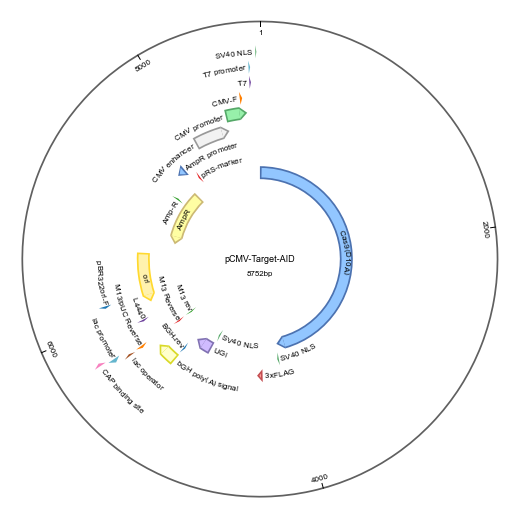

In [32]:
fig = visualize(pCMV_Target_AID, map_view="circular")
fig.savefig("output/pCMV-Target-AID.pdf")

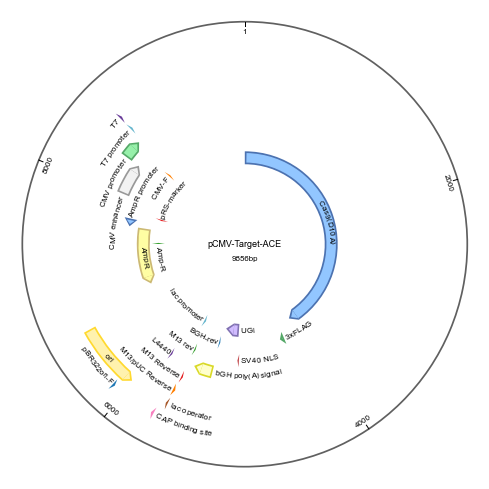

In [33]:
fig = visualize(pCMV_Target_ACE, map_view="circular")
fig.savefig("output/pCMV-Target-ACE.pdf")

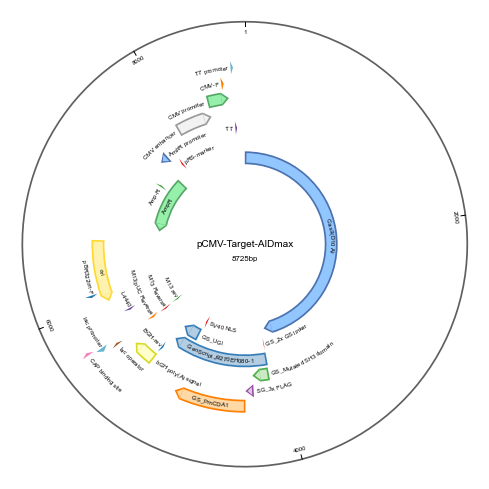

In [34]:
fig = visualize(pCMV_Target_AIDmax, map_view="circular", fontsize=6)
fig.savefig("output/pCMV-Target-AIDmax.pdf")

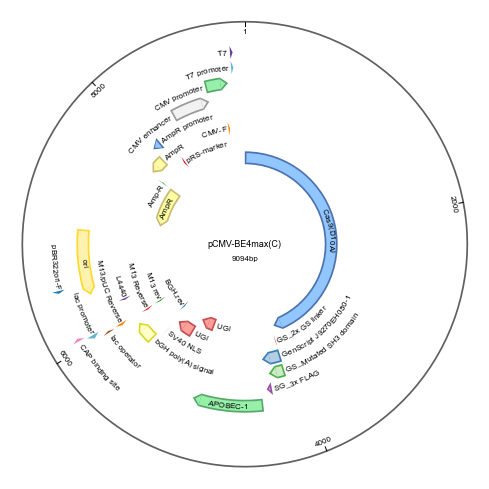

In [35]:
fig = visualize(pCMV_BE4maxC, map_view="circular")
fig.savefig("output/pCMV-BE4max(C).pdf")

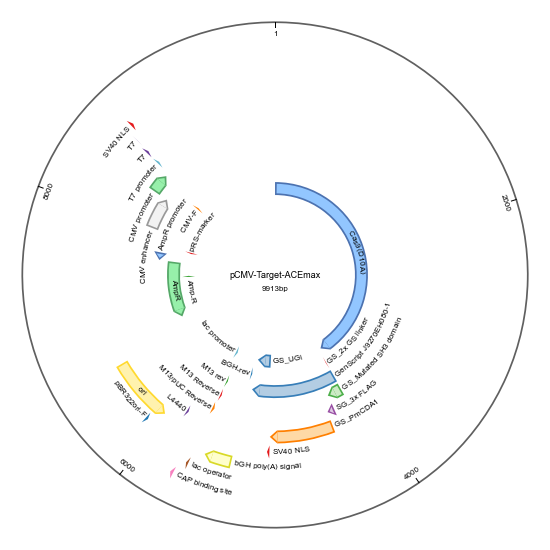

In [36]:
fig = visualize(pCMV_Target_ACEmax, map_view="circular")
fig.savefig("output/pCMV-Target-ACEmax.pdf")

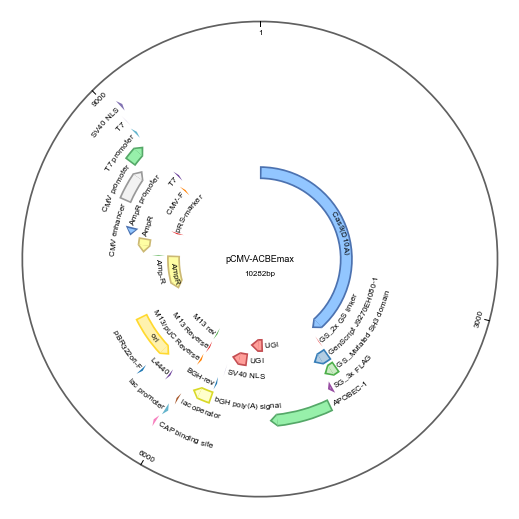

In [37]:
fig = visualize(pCMV_ACBEmax, map_view="circular")
fig.savefig("output/pCMV-ACBEmax.pdf")